In [1]:
%matplotlib inline

In [2]:
import  os
import  sys
import  glob
import  mpld3

In [3]:
import  pdfkit
import  fitsio
import  redrock
import  datetime
import  redrock.templates

import  pandas                  as      pd
import  pylab                   as      pl
import  numpy                   as      np
import  matplotlib.pyplot       as      plt
import  astropy.io.fits         as      fits
import  matplotlib.pyplot       as      plt
import  astropy.io.fits         as      fits

from    astropy.table           import  Table, join, vstack, unique
from    astropy.coordinates     import  SkyCoord
from    astropy                 import  units as u
from    desitarget.cmx          import  cmx_targetmask
from    desitarget              import  targetmask
from    desispec.interpolation  import  resample_flux
from    desispec.resolution     import  Resolution
from    desispec.specscore      import  compute_frame_scores
from    collections             import  OrderedDict
from    mpl_toolkits.axes_grid1 import  make_axes_locatable
from    itertools               import  combinations
from    desisurvey.utils        import  get_date

In [4]:
##  DR7 cutouts
import  requests

from    PIL                     import  Image
from    io                      import  BytesIO

In [10]:
# Prospect
sys.path.append("/global/homes/m/mjwilson/BGS/MINISV/prospect/py/")

import desispec
import prospect

from   prospect                import utils_specviewer, plotframes

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]

In [12]:
# mpld3.enable_notebook()

In [13]:
def flux2mag(flux) :
    mag = -2.5*np.log10(flux*(flux>0) + 0.001*(flux<=0)) + 22.5
    mag[(flux<=0)] = 0.
    
    return  mag

##  DR7 cutouts 

In [14]:
def get_dr7cutout(ra, dec):
  nim         = len(ra)
  nrow        =  np.maximum(np.floor(nim / 5).astype(np.int), 1)

  fig, axes   = plt.subplots(nrow, 5, figsize=(20, 5 * nrow))

  row         = 0
  col         = 0

  nmax        = np.minimum(5 * nrow, nim)
  
  for i in range(nmax):        
    url       = 'http://legacysurvey.org/viewer/jpeg-cutout?ra={:.4f}&dec={:.4f}&layer=decals-dr7&pixscale=0.27&bands=grz'.format(ra[i], dec[i])
    response  = requests.get(url)
    img       = Image.open(BytesIO(response.content))

    axes[row, col].imshow(img)
    
    col      += 1
    
    if col > 4:
        row  += 1
        col   = 0 

##  Night log.
http://desi-www.kpno.noao.edu:8090/nightsum/nightsum-2020-02-25/nightsum.html

##  Mini SV page.
https://desi.lbl.gov/trac/wiki/TargetSelectionWG/miniSV2

#  Summary 

In [15]:
# /global/homes/m/mjwilson/BGS/MINISV/zhou
version = 'v2'
root    = '/global/projecta/projectdirs/desi/spectro/redux/minisv2/exposures/20200226/'

In [16]:
expid   = 52267

In [17]:
def get_calibs(expid, specid=0, _type='sky'):
  ##  sky, stdstars, fluxcalib, psf. 
  bands = ['b', 'r', 'z']   

  if _type == 'stdstars':
     return  fits.open(root + '/{:08d}/{}-{}-{:08d}.fits'.format(expid, _type, specid, expid))

  else:
     dat = [fits.open(root + '/{:08d}/{}-{}{}-{:08d}.fits'.format(expid, _type, band, specid, expid)) for band in bands]
        
     return   dict(zip(bands, dat))

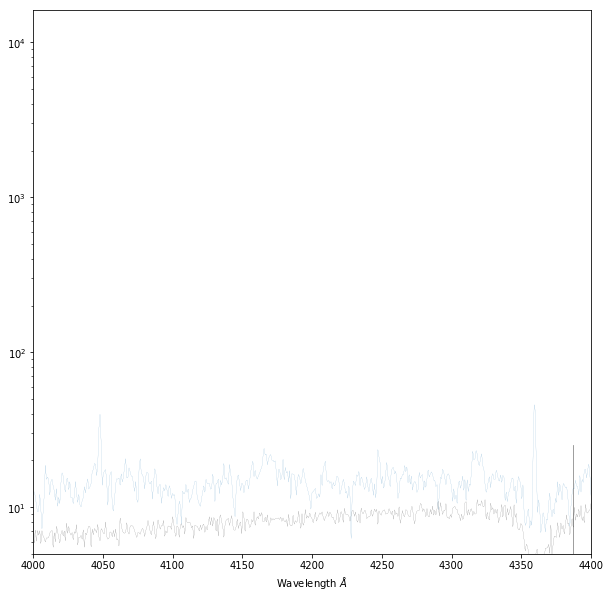

In [24]:
for i, petal in enumerate([0]):
  skies   = get_calibs(expid, specid=petal, _type='sky')
  fcalibs = get_calibs(expid, specid=0, _type='fluxcalib')

  pl.axvline(4387.0,  ymin=0, ymax=.2, c='k', alpha=0.5, lw=0.75)
  pl.axvline(5578.5, ymin=0, ymax=.2, c='k', alpha=0.5, lw=0.75)
  pl.axvline(5790.0,  ymin=0, ymax=.2, c='k', alpha=0.5, lw=0.75)
  pl.axvline(7600.0,  ymin=0, ymax=.2, c='k', alpha=0.5, lw=0.75)    

  # SDSS
  pl.axvline(5894.6,  ymin=0, ymax=.2, c='b', alpha=0.5, lw=0.75)  
  pl.axvline(6301.7,  ymin=0, ymax=.2, c='b', alpha=0.5, lw=0.75)  
  pl.axvline(7246.0,  ymin=0, ymax=.2, c='b', alpha=0.5, lw=0.75)  

  for band in skies.keys():
    pl.semilogy(skies[band][3].data, np.mean(skies[band][0].data, axis=0), lw=0.1)
    
  for band in fcalibs.keys():
    pl.semilogy(fcalibs[band][3].data, 30. * fcalibs[band][0].data[i,:] / fcalibs[band][0].data[i,:].max(), lw=0.1, c='k')
    
  pl.xlim(4.e3, 1.e4)
  pl.ylim(bottom=5.)
    
  pl.xlabel(r'Wavelength $\AA$')
  pl.xlim(4000. , 4400.)

In [48]:
# stds = get_calibs(expid, specid=0, _type='stdstars')

##  Done. 